# Wykład 8 - Web Scraping, Machine Learning



https://github.com/MichalKorzycki/WarsztatPythonDataScience.git/

---
## Lista obecności
## http://bit.ly/SKNSwyklad1803 

---

---
## Zadanie 2
Wypisać linki ogłoszeń z:
https://www.gumtree.pl/s-mieszkania-i-domy-sprzedam-i-kupie/v1c9073p1

In [ ]:
import scrapy
from scrapy.crawler import CrawlerProcess
from scrapy.http import Request


class GumtreeApartmentsSpider(scrapy.Spider):
    name = 'gumtreeapartmentsspider'
    start_urls = [
        'https://www.gumtree.pl/s-mieszkania-i-domy-sprzedam-i-kupie/warszawa/v1c9073l3200008p1/'
        ]
   
    custom_settings = {
        'DOWNLOAD_DELAY': '3.0', 
        'ROBOTSTXT_OBEY' : True,
        'USER_AGENT': 'Testing MyCrawler (mojmail@gmail.com)'
    }

    top_url = 'https://www.gumtree.pl'
    def parse(self, response):
        self.logger.info('Got successful response from {}'.format(response.url))
        soup = BeautifulSoup(response.body,'html.parser')
        hrefs = tab.findAll("a", {"class": "href-link"})
        for h in hrefs:
            yield self.top_url + h["href"] #dopisuje 'https://www.gumtree.pl', bo otrzymany adres jest względny, przygotowuje listę wszystkich linków
                

---

# 1. Jak zbudować grzecznego pająka

https://www.scrapehero.com/how-to-prevent-getting-blacklisted-while-scraping/

- Uwzględniać robots.txt
- Nie "męczyć" serwera
- Przedstawiać się

In [ ]:
# robots.txt

In [ ]:
    custom_settings = {
        'DOWNLOAD_DELAY': '3.0', 
        'ROBOTSTXT_OBEY' : True,
        'USER_AGENT': 'Testing MyCrawler (mojmail@gmail.com)'
    }

---
# 2. Machine Learning

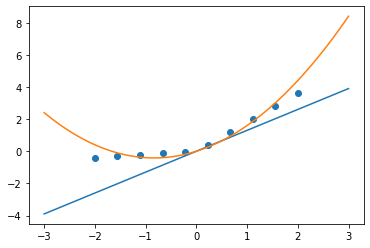

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3, 3, 100)
plt.plot(x, 1.3*x)
plt.plot(x, x+0.6*x*x)
x = np.linspace(-2, 2, 10)
plt.scatter(x, x+0.8*np.abs(x));

## 2.1 Proces Nauczania modelu z nadzorem

In [ ]:
1. Dzielimy dane na treningowe (typowo 80%) i testowe (typowo 20%)
2. Budujemy model tak aby dopasować jak najlepiej do danych treningowych
3. Oceniamy model jak dobrze pasuje do danych testowych
4. Żonglujemy parametrami aby zminimalizować błąd w (3)

## 2.2 Przykład regresji liniowej

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

In [17]:
from sklearn import datasets

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [18]:
diabetes_X 

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [20]:
diabetes_X.size

442

In [19]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]


In [ ]:

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

---
Zadanie 1:

    Wyciągnąć ze strony https://www.gumtree.pl/a-mieszkania-i-domy-sprzedam-i-kupie/srodmiescie/dwupokojowe-mieszkanie-na-sprzedaz-chmielna/1006950207540911136948109 wszystkie parametry opisujące lokal

---